# Binance Client Test Notebook

In [4]:
import sys
import os
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from clients.binance_client import BinanceClient

/Users/cleme/stablecoins_optimizer/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Initialize Binance Client

In [5]:
# Initialize client (add your API key and secret if you have them)
client = BinanceClient()

## Fetch Current Funding Rates

In [14]:
symbols = ['BTC/USDT:USDT', 
           'ETH/USDT:USDT', 
           'SOL/USDT:USDT', 
           'XRP/USDT:USDT', 
           'BNB/USDT:USDT', 
           'DOGE/USDT:USDT', 
           '1000PEPE/USDT:USDT', 
           'TON/USDT:USDT', 
           'AVAX/USDT:USDT', 
           'WIF/USDT:USDT', 
           'MATIC/USDT:USDT', 
           'AAVE/USDT:USDT', 
           'LINK/USDT:USDT', 
           'SUI/USDT:USDT', 
           'ADA/USDT:USDT']
current_rates = client.get_current_funding_rates(symbols)
print("Current Funding Rates:")
display(current_rates)

Current Funding Rates:


,Symbol,Mark Price,Index Price,Funding Rate,Timestamp,Datetime,Funding Timestamp,Funding Datetime,Annualized Funding Rate
0,BTC/USDT:USDT,60811.900000,60849.875532,-0.000018,1724318150000,2024-08-22T09:15:50.000Z,1724342400000,2024-08-22T16:00:00.000Z,-1.999470
1,ETH/USDT:USDT,2626.140000,2627.150227,0.000026,1724318150000,2024-08-22T09:15:50.000Z,1724342400000,2024-08-22T16:00:00.000Z,2.824005
2,SOL/USDT:USDT,142.652392,142.714413,0.000068,1724318150000,2024-08-22T09:15:50.000Z,1724342400000,2024-08-22T16:00:00.000Z,7.406580
3,XRP/USDT:USDT,0.598100,0.598619,0.000060,1724318151000,2024-08-22T09:15:51.000Z,1724342400000,2024-08-22T16:00:00.000Z,6.583140
4,BNB/USDT:USDT,576.704318,576.904128,0.000000,1724318151000,2024-08-22T09:15:51.000Z,1724342400000,2024-08-22T16:00:00.000Z,0.000000
5,DOGE/USDT:USDT,0.105870,0.105936,0.000049,1724318151000,2024-08-22T09:15:51.000Z,1724342400000,2024-08-22T16:00:00.000Z,5.357835
6,1000PEPE/USDT:USDT,0.007899,0.007902,-0.000056,1724318152000,2024-08-22T09:15:52.000Z,1724342400000,2024-08-22T16:00:00.000Z,-6.171420
7,TON/USDT:USDT,6.502500,6.505417,0.000050,1724318152000,2024-08-22T09:15:52.000Z,1724328000000,2024-08-22T12:00:00.000Z,5.475000
8,AVAX/USDT:USDT,23.211000,23.231777,-0.000055,1724318153000,2024-08-22T09:15:53.000Z,1724342400000,2024-08-22T16:00:00.000Z,-5.983080
9,WIF/USDT:USDT,1.584300,1.584878,-0.000043,1724318153000,2024-08-22T09:15:53.000Z,1724328000000,2024-08-22T12:00:00.000Z,-4.749015


## Visualize Current Funding Rates

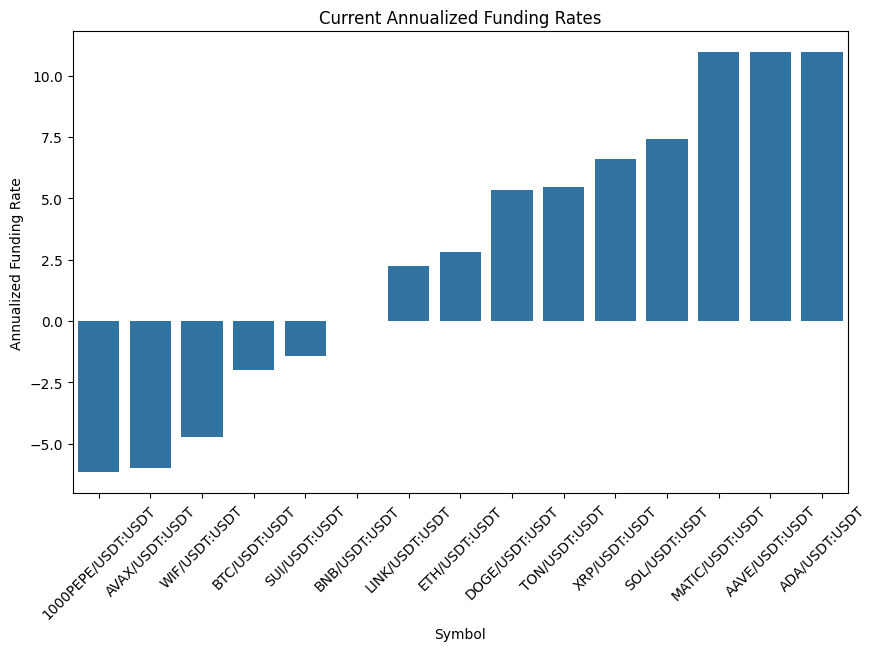

In [15]:
plt.figure(figsize=(10, 6))
current_rates_sorted = current_rates.sort_values(by='Annualized Funding Rate')
sns.barplot(x='Symbol', y='Annualized Funding Rate', data=current_rates_sorted)
plt.title('Current Annualized Funding Rates')
plt.xticks(rotation=45)
plt.show()

## Fetch Historical Funding Rates

In [25]:
start_time = datetime.now() - timedelta(days=30)
start_time.timestamp() * 1000

1721726426516.022

In [29]:
# Fetch Historical Funding Rates
symbol = 'BTC/USDT:USDT'
# Define start_time as a datetime object
start_time = datetime.now() - timedelta(days=30)
# Define end_time as the current datetime
end_time = datetime.now()

# Pass both datetime objects to the method
historical_rates = client.get_historical_funding_rates(symbol, start_time, end_time)
print("Historical Funding Rates:")
display(historical_rates.head())

ERROR:clients.binance_client:Error fetching historical funding rates for BTC/USDT:USDT: binance {"status":"ERROR","type":"VALID","code":"000002","errorData":{"limit":"Failed to convert property value of type 'java.lang.String' to required type 'java.lang.Integer' for property 'limit'; nested exception is java.lang.NumberFormatException: For input string: \"1724318575189\""},"data":null,"subData":null,"params":null}


Historical Funding Rates:


""


## Visualize Historical Funding Rates

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(historical_rates['datetime'], historical_rates['annualized_rate'])
plt.title(f'Historical Annualized Funding Rates for {symbol}')
plt.xlabel('Date')
plt.ylabel('Annualized Funding Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Fetch OHLCV Data

In [30]:
ohlcv_data = client.get_ohlcv(symbol, '1d', since=start_time)
print("OHLCV Data:")
display(ohlcv_data.head())

OHLCV Data:


,timestamp,open,high,low,close,volume,datetime
0,1721779200000,65916.3,67087.3,65040.5,65350.8,215079.421,2024-07-24
1,1721865600000,65350.7,66144.0,63456.7,65773.0,319685.441,2024-07-25
2,1721952000000,65773.0,68200.0,65688.2,67882.5,235384.526,2024-07-26
3,1722038400000,67882.5,69381.7,66624.5,67873.8,330982.647,2024-07-27
4,1722124800000,67873.7,68300.0,67037.0,68215.5,116913.935,2024-07-28


## Visualize OHLCV Data

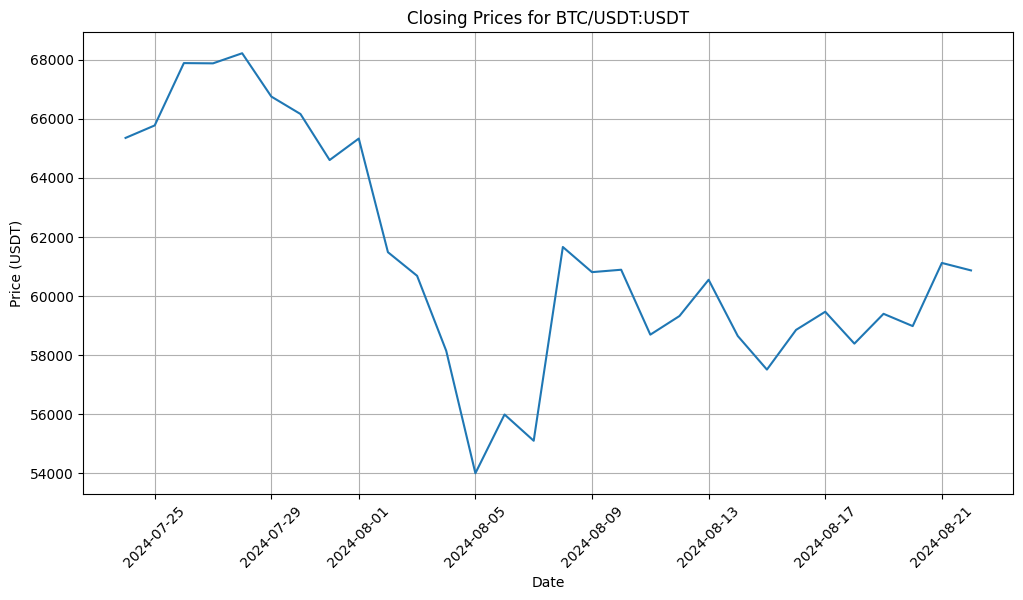

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(ohlcv_data['datetime'], ohlcv_data['close'])
plt.title(f'Closing Prices for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Analyze Correlation Between Price and Funding Rate

In [32]:
# Merge OHLCV and funding rate data
merged_data = pd.merge(ohlcv_data, historical_rates, left_on='datetime', right_on='datetime', how='inner')

# Calculate correlation
correlation = merged_data['close'].corr(merged_data['annualized_rate'])
print(f"Correlation between price and funding rate: {correlation:.2f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['close'], merged_data['annualized_rate'])
plt.title(f'Price vs Funding Rate for {symbol}')
plt.xlabel('Price (USDT)')
plt.ylabel('Annualized Funding Rate (%)')
plt.grid(True)
plt.show()

KeyError: 'datetime'